In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

al = pd.read_csv('S:/Hackathons/EY/results/scaled_dist_data.csv')

In [50]:
al.head(5)

,state,District_Key,confirmed,active,recovered,deceased,migrated_other,density,urbans,full_immunes,elderlies,hh_more_than_4,cold_chain_points,storage_cap_lits
0,Andaman and Nicobar Islands,AN_Nicobar,0.000000,0.000704,0.000000,0.000000,0,0.000504,0.002414,0.003897,0.001921,0.001865,0.006166,0.006166
1,Andaman and Nicobar Islands,AN_North and Middle Andaman,0.000004,0.000704,0.000004,0.000000,0,0.000721,0.007598,0.011429,0.006130,0.006770,0.022285,0.022285
2,Andaman and Nicobar Islands,AN_South Andaman,0.000200,0.001076,0.000130,0.000000,0,0.002323,0.017593,0.025948,0.014243,0.016226,0.053358,0.053358
3,Andhra Pradesh,AP_Anantapur,0.263420,0.003618,0.270190,0.081284,0,0.005595,0.272112,0.356739,0.365251,0.294924,0.351934,0.351934
4,Andhra Pradesh,AP_Chittoor,0.335082,0.009545,0.342299,0.114344,0,0.007221,0.277927,0.364356,0.373053,0.301235,0.359499,0.359499


In [51]:
al.columns

Index(['state', 'District_Key', 'confirmed', 'active', 'recovered', 'deceased',
       'migrated_other', 'density', 'urbans', 'full_immunes', 'elderlies',
       'hh_more_than_4', 'cold_chain_points', 'storage_cap_lits'],
      dtype='object')

In [52]:
cluster_data = al[['active', 'density', 'urbans', 'full_immunes', 'elderlies','hh_more_than_4', 'cold_chain_points',
                   'storage_cap_lits']]
cluster_data.head()

,active,density,urbans,full_immunes,elderlies,hh_more_than_4,cold_chain_points,storage_cap_lits
0,0.000704,0.000504,0.002414,0.003897,0.001921,0.001865,0.006166,0.006166
1,0.000704,0.000721,0.007598,0.011429,0.006130,0.006770,0.022285,0.022285
2,0.001076,0.002323,0.017593,0.025948,0.014243,0.016226,0.053358,0.053358
3,0.003618,0.005595,0.272112,0.356739,0.365251,0.294924,0.351934,0.351934
4,0.009545,0.007221,0.277927,0.364356,0.373053,0.301235,0.359499,0.359499


In [53]:
cluster_data['full_immunes']  = 1-cluster_data['full_immunes'] 
cluster_data['cold_chain_points']  = 1-cluster_data['cold_chain_points'] 
cluster_data['storage_cap_lits']  = 1-cluster_data['storage_cap_lits'] 

<ipython-input-53-8ff59b69306f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['full_immunes']  = 1-cluster_data['full_immunes']
<ipython-input-53-8ff59b69306f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['cold_chain_points']  = 1-cluster_data['cold_chain_points']
<ipython-input-53-8ff59b69306f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [67]:
dis = al['District_Key'].apply(lambda x : x[3:])
cluster_data['district'] = dis
cluster_data['state'] = al['state']

<ipython-input-67-d95262f320d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['district'] = dis
<ipython-input-67-d95262f320d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['state'] = al['state']


In [70]:
cluster_data.head()

,active,density,urbans,full_immunes,elderlies,hh_more_than_4,cold_chain_points,storage_cap_lits,cluster,district,index,state
0,0.000704,0.000504,0.002414,0.996103,0.001921,0.001865,0.993834,0.993834,6,Nicobar,0.015309,Andaman and Nicobar Islands
1,0.000704,0.000721,0.007598,0.988571,0.006130,0.006770,0.977715,0.977715,6,North and Middle Andaman,0.024973,Andaman and Nicobar Islands
2,0.001076,0.002323,0.017593,0.974052,0.014243,0.016226,0.946642,0.946642,6,South Andaman,0.041541,Andaman and Nicobar Islands
3,0.003618,0.005595,0.272112,0.643261,0.365251,0.294924,0.648066,0.648066,2,Anantapur,0.141457,Andhra Pradesh
4,0.009545,0.007221,0.277927,0.635644,0.373053,0.301235,0.640501,0.640501,2,Chittoor,0.165446,Andhra Pradesh


In [76]:
cluster_data.to_csv('S:/Hackathons/EY/results/indexed.csv',index = False)

In [77]:
cluster_data.head()

,active,density,urbans,full_immunes,elderlies,hh_more_than_4,cold_chain_points,storage_cap_lits,cluster,district,index,state
0,0.000704,0.000504,0.002414,0.996103,0.001921,0.001865,0.993834,0.993834,6,Nicobar,0.015309,Andaman and Nicobar Islands
1,0.000704,0.000721,0.007598,0.988571,0.006130,0.006770,0.977715,0.977715,6,North and Middle Andaman,0.024973,Andaman and Nicobar Islands
2,0.001076,0.002323,0.017593,0.974052,0.014243,0.016226,0.946642,0.946642,6,South Andaman,0.041541,Andaman and Nicobar Islands
3,0.003618,0.005595,0.272112,0.643261,0.365251,0.294924,0.648066,0.648066,2,Anantapur,0.141457,Andhra Pradesh
4,0.009545,0.007221,0.277927,0.635644,0.373053,0.301235,0.640501,0.640501,2,Chittoor,0.165446,Andhra Pradesh


In [78]:
cluster_data['index'] = np.power(cluster_data['density']*cluster_data['urbans']*cluster_data['full_immunes']*cluster_data['elderlies']*cluster_data['hh_more_than_4']*cluster_data['cold_chain_points']*cluster_data['storage_cap_lits'],1/7)

<ipython-input-78-59b5e749f4fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['index'] = np.power(cluster_data['density']*cluster_data['urbans']*cluster_data['full_immunes']*cluster_data['elderlies']*cluster_data['hh_more_than_4']*cluster_data['cold_chain_points']*cluster_data['storage_cap_lits'],1/7)


C:\Users\dines\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='index', ylabel='active'>

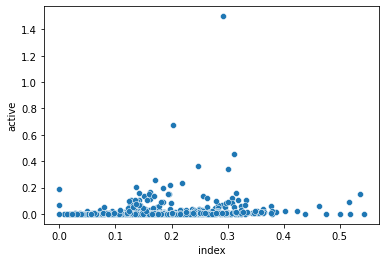

In [79]:
import seaborn as sns
sns.scatterplot(cluster_data['index'],cluster_data['active'])

In [73]:
cluster_data.head()

,active,density,urbans,full_immunes,elderlies,hh_more_than_4,cold_chain_points,storage_cap_lits,cluster,district,index,state
0,0.000704,0.000504,0.002414,0.996103,0.001921,0.001865,0.993834,0.993834,6,Nicobar,0.015309,Andaman and Nicobar Islands
1,0.000704,0.000721,0.007598,0.988571,0.006130,0.006770,0.977715,0.977715,6,North and Middle Andaman,0.024973,Andaman and Nicobar Islands
2,0.001076,0.002323,0.017593,0.974052,0.014243,0.016226,0.946642,0.946642,6,South Andaman,0.041541,Andaman and Nicobar Islands
3,0.003618,0.005595,0.272112,0.643261,0.365251,0.294924,0.648066,0.648066,2,Anantapur,0.141457,Andhra Pradesh
4,0.009545,0.007221,0.277927,0.635644,0.373053,0.301235,0.640501,0.640501,2,Chittoor,0.165446,Andhra Pradesh


In [24]:
! pip install pyclustertend 

# hopkins Test

In [28]:
X = cluster_data.drop(columns = ['district','cluster'])
from pyclustertend import hopkins
hopkins(X, X.shape[0])

0.027480624031331998

In [54]:
cluster_data.head()

,active,density,urbans,full_immunes,elderlies,hh_more_than_4,cold_chain_points,storage_cap_lits
0,0.000704,0.000504,0.002414,0.996103,0.001921,0.001865,0.993834,0.993834
1,0.000704,0.000721,0.007598,0.988571,0.006130,0.006770,0.977715,0.977715
2,0.001076,0.002323,0.017593,0.974052,0.014243,0.016226,0.946642,0.946642
3,0.003618,0.005595,0.272112,0.643261,0.365251,0.294924,0.648066,0.648066
4,0.009545,0.007221,0.277927,0.635644,0.373053,0.301235,0.640501,0.640501


# K-means

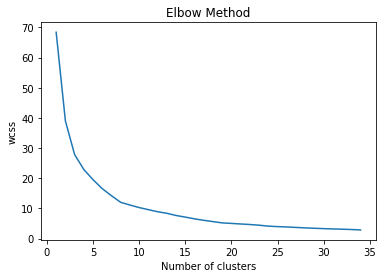

In [55]:


X = pd.DataFrame(cluster_data)
X = X.values
from sklearn.cluster import KMeans
wcss = []
for i in range(1,35):
    km = KMeans(n_clusters = i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,35),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()


In [56]:
km10=KMeans(n_clusters=10,init='k-means++', max_iter=300, n_init=10, random_state=0)
k_means = km10.fit(X)


In [57]:
k_means.labels_

array([6, 6, 6, 2, 2, 2, 2, 9, 2, 2, 2, 9, 9, 2, 9, 2, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 3, 6, 6, 3, 6, 6,
       0, 6, 3, 0, 6, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 6, 0, 9, 6, 0, 6, 3,
       0, 6, 6, 7, 6, 3, 3, 7, 7, 3, 0, 7, 7, 7, 3, 0, 0, 0, 7, 0, 0, 0,
       3, 7, 0, 7, 7, 3, 7, 7, 7, 0, 7, 7, 6, 6, 7, 7, 3, 7, 7, 3, 0, 0,
       6, 0, 6, 6, 3, 6, 0, 9, 6, 6, 3, 0, 6, 6, 0, 6, 0, 6, 6, 3, 2, 3,
       6, 6, 6, 6, 6, 0, 0, 0, 1, 3, 9, 0, 9, 3, 9, 6, 0, 9, 6, 0, 3, 0,
       9, 9, 9, 9, 0, 9, 0, 6, 3, 9, 3, 6, 9, 9, 1, 3, 0, 2, 3, 0, 3, 6,
       3, 0, 3, 3, 0, 3, 0, 3, 0, 0, 0, 0, 6, 0, 0, 0, 0, 3, 6, 6, 6, 3,
       6, 6, 6, 0, 0, 6, 6, 6, 0, 0, 6, 0, 6, 6, 3, 6, 6, 6, 0, 6, 6, 6,
       6, 6, 6, 6, 3, 6, 3, 0, 0, 7, 0, 3, 0, 3, 0, 0, 6, 6, 6, 6, 6, 0,
       3, 0, 7, 0, 0, 6, 0, 9, 9, 2, 0, 8, 3, 9, 0, 3, 0, 3, 9, 9, 9, 0,
       9, 9, 3, 6, 3, 3, 9, 9, 9, 0, 9, 9, 3, 3, 3, 9, 2, 0, 9, 3, 9, 9,
       2, 2, 2, 3, 2, 2, 0, 6, 6, 6, 6, 3, 0, 0, 3,

In [58]:
cluster_data['cluster'] = k_means.labels_
cluster_data.head(5)

<ipython-input-58-c9c00c9fdffe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['cluster'] = k_means.labels_


,active,density,urbans,full_immunes,elderlies,hh_more_than_4,cold_chain_points,storage_cap_lits,cluster
0,0.000704,0.000504,0.002414,0.996103,0.001921,0.001865,0.993834,0.993834,6
1,0.000704,0.000721,0.007598,0.988571,0.006130,0.006770,0.977715,0.977715,6
2,0.001076,0.002323,0.017593,0.974052,0.014243,0.016226,0.946642,0.946642,6
3,0.003618,0.005595,0.272112,0.643261,0.365251,0.294924,0.648066,0.648066,2
4,0.009545,0.007221,0.277927,0.635644,0.373053,0.301235,0.640501,0.640501,2


# Schollete coef

In [58]:
cluster_data['cluster'] = k_means.labels_
cluster_data.head(5)

<ipython-input-58-c9c00c9fdffe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['cluster'] = k_means.labels_


,active,density,urbans,full_immunes,elderlies,hh_more_than_4,cold_chain_points,storage_cap_lits,cluster
0,0.000704,0.000504,0.002414,0.996103,0.001921,0.001865,0.993834,0.993834,6
1,0.000704,0.000721,0.007598,0.988571,0.006130,0.006770,0.977715,0.977715,6
2,0.001076,0.002323,0.017593,0.974052,0.014243,0.016226,0.946642,0.946642,6
3,0.003618,0.005595,0.272112,0.643261,0.365251,0.294924,0.648066,0.648066,2
4,0.009545,0.007221,0.277927,0.635644,0.373053,0.301235,0.640501,0.640501,2


# DBSCAN

In [36]:
from sklearn.cluster import DBSCAN
import numpy as np

clustering = DBSCAN().fit(X)


In [41]:
X.iloc[:,:]

,active,density,urbans,full_immunes,elderlies,hh_more_than_4,cold_chain_points,storage_cap_lits
0,0.000704,0.000504,0.002414,0.996103,0.001921,0.001865,0.993834,0.993834
1,0.000704,0.000721,0.007598,0.988571,0.006130,0.006770,0.977715,0.977715
2,0.001076,0.002323,0.017593,0.974052,0.014243,0.016226,0.946642,0.946642
3,0.003618,0.005595,0.272112,0.643261,0.365251,0.294924,0.648066,0.648066
4,0.009545,0.007221,0.277927,0.635644,0.373053,0.301235,0.640501,0.640501
...,...,...,...,...,...,...,...,...
706,0.045923,0.006829,0.058440,0.923118,0.078565,0.063051,0.960890,0.960890
707,0.067888,0.006710,0.049786,0.934453,0.066954,0.053659,0.967009,0.967009
708,0.217862,0.022891,0.075420,0.900879,0.101347,0.081477,0.948883,0.948883
709,0.069667,0.008645,0.047444,0.937521,0.063811,0.051118,0.968665,0.968665


## Confirmation

For n_clusters = 2 The average silhouette_score is : 0.32286866276471443
For n_clusters = 3 The average silhouette_score is : 0.11480469433349212
For n_clusters = 4 The average silhouette_score is : 0.044207601759439295
For n_clusters = 5 The average silhouette_score is : 0.05536481297033
For n_clusters = 6 The average silhouette_score is : 0.07903856282015309
For n_clusters = 7 The average silhouette_score is : 0.08493995680157218
For n_clusters = 8 The average silhouette_score is : 0.014526536438580677
For n_clusters = 9 The average silhouette_score is : 0.11096142233619707
For n_clusters = 10 The average silhouette_score is : 0.08189678058819816
For n_clusters = 11 The average silhouette_score is : 0.0938852615271467
For n_clusters = 12 The average silhouette_score is : 0.05063637570285631
For n_clusters = 13 The average silhouette_score is : 0.01905272372629734


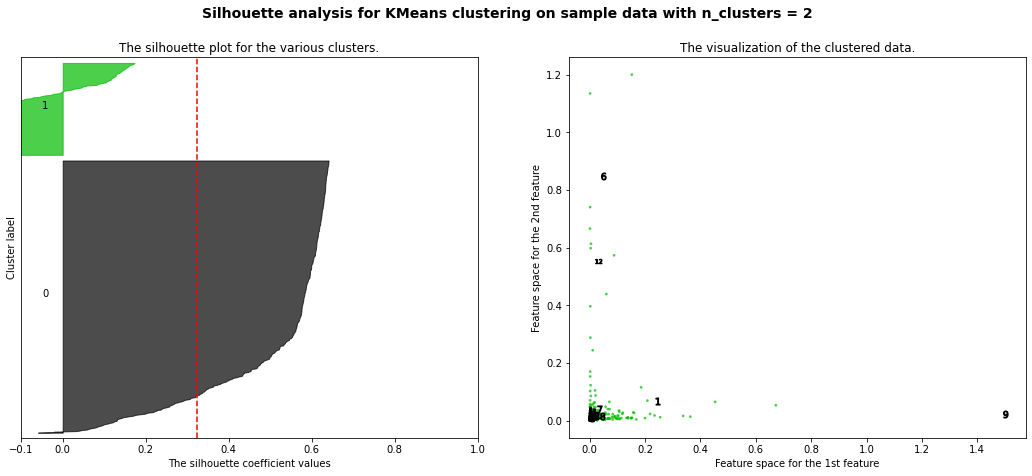

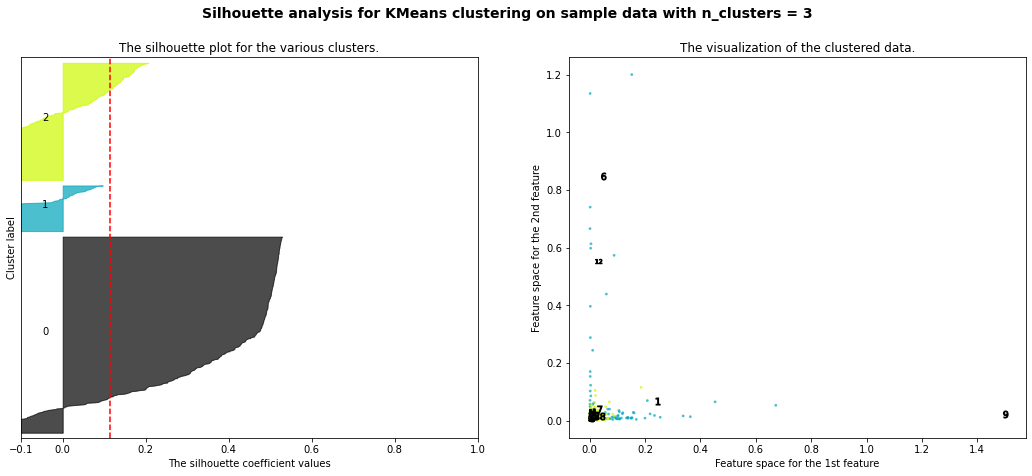

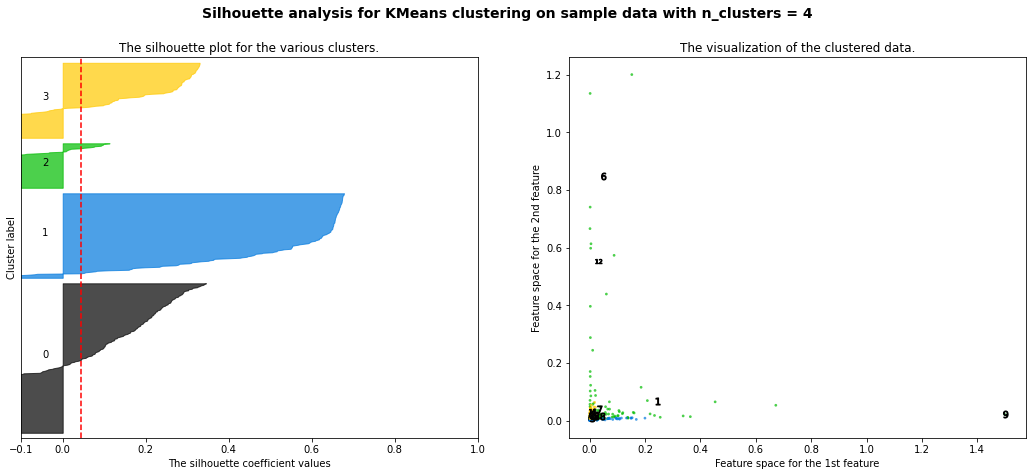

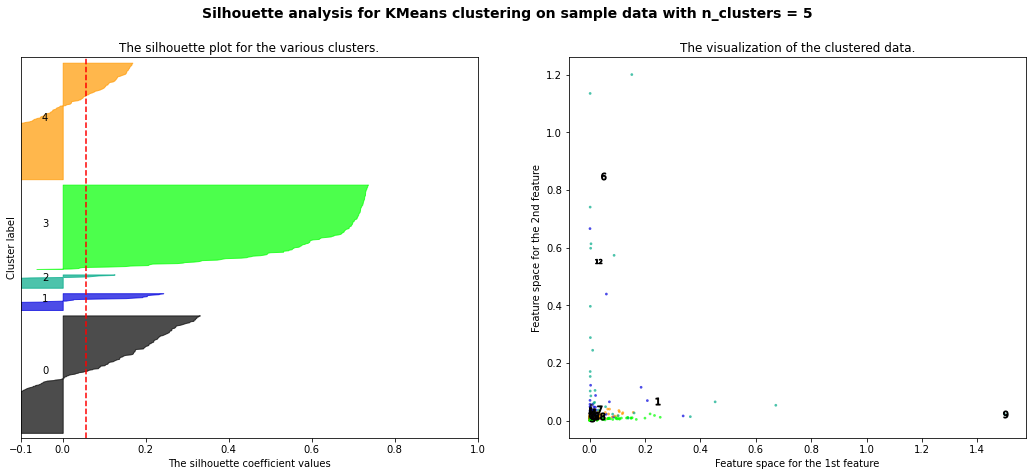

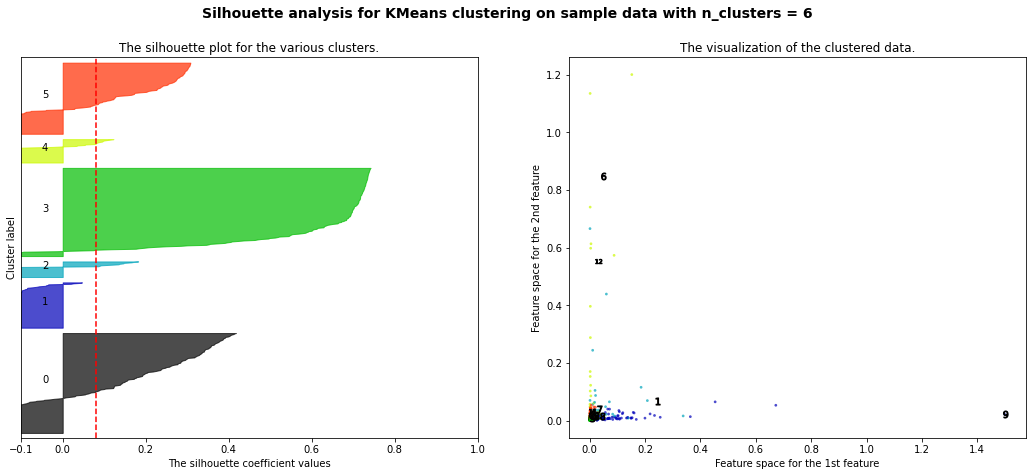

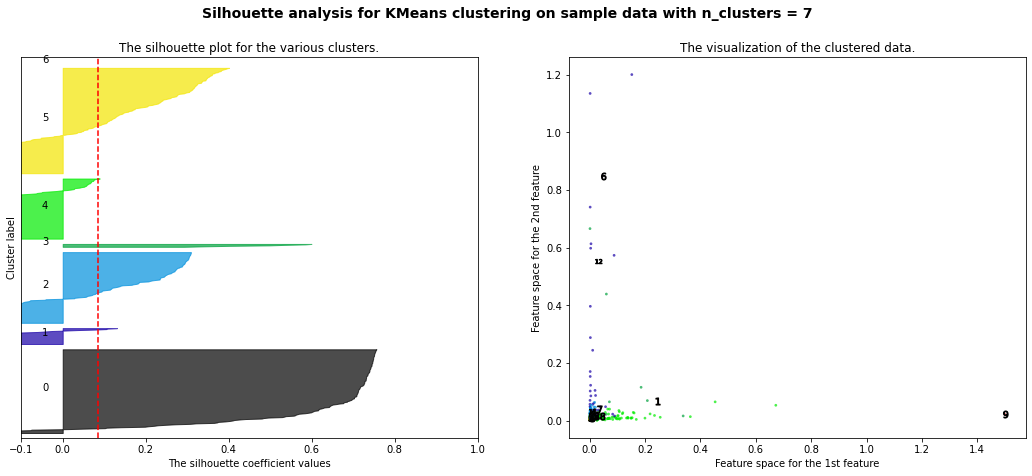

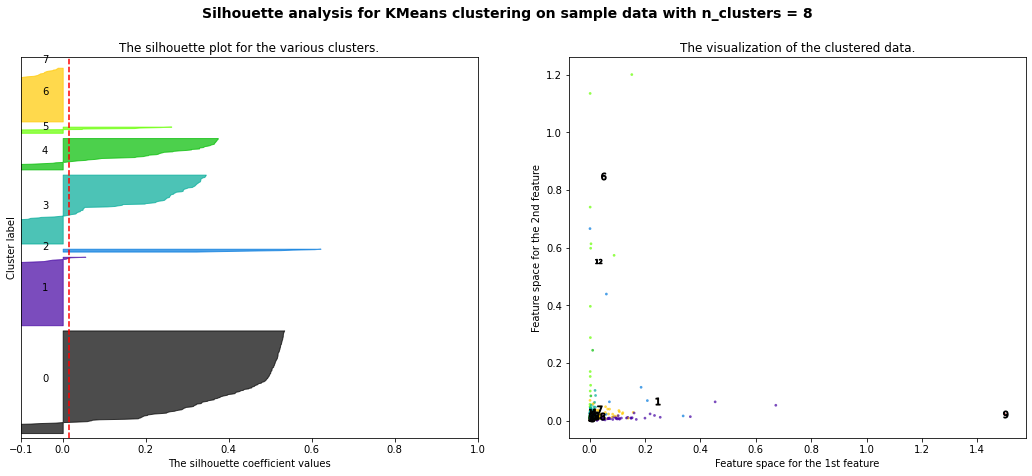

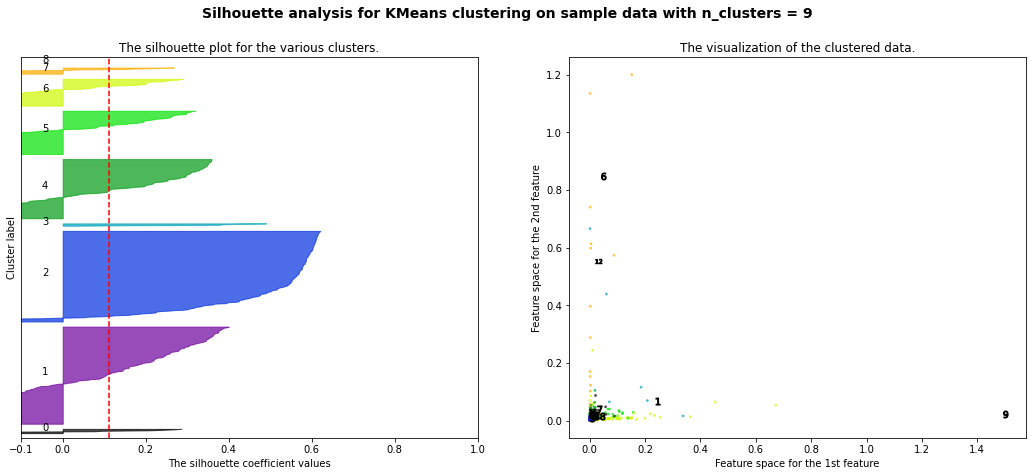

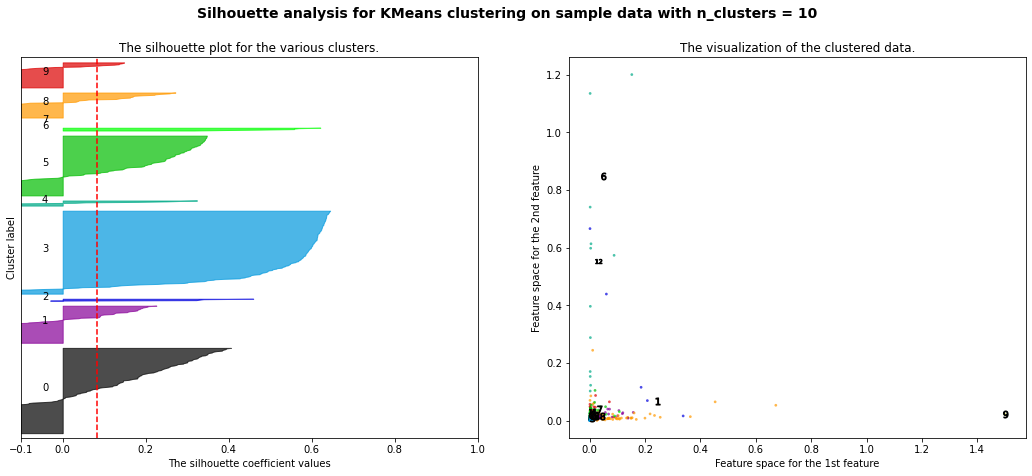

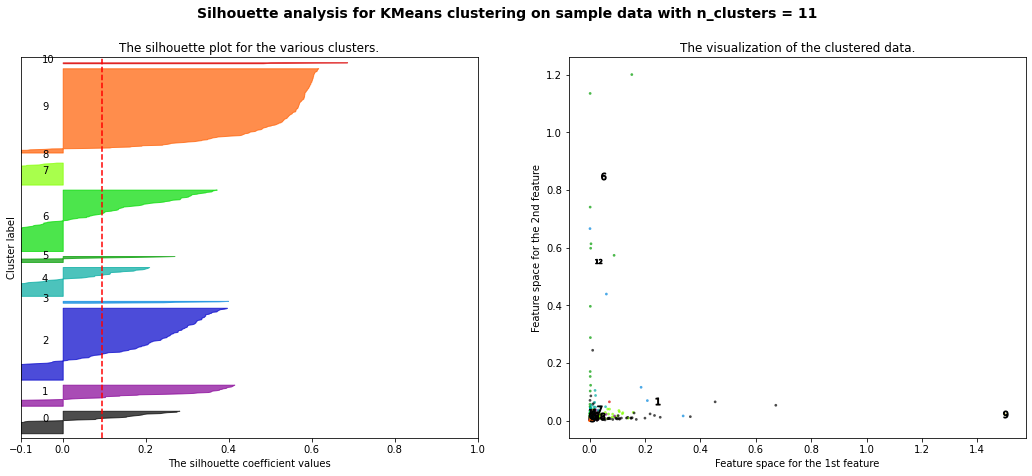

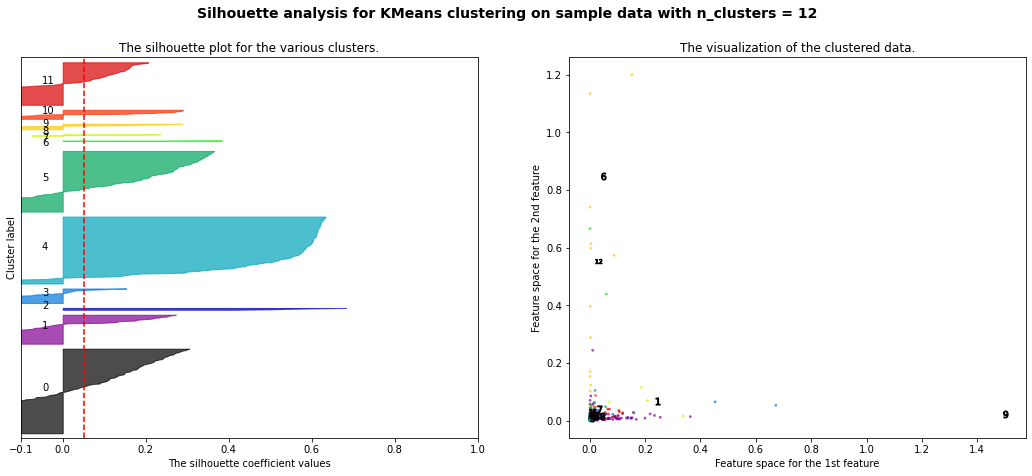

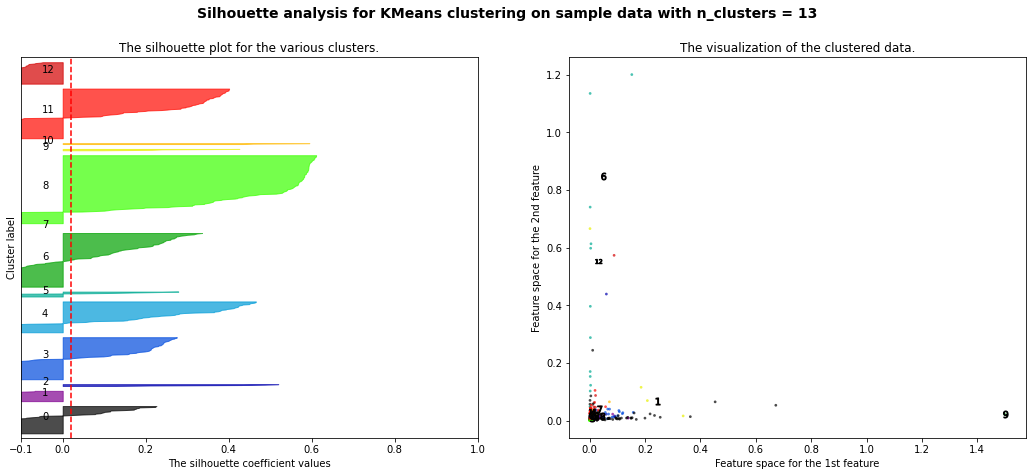

In [44]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)


import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as n

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = GaussianMixture(n_components=n_clusters).fit(X.iloc[:,:])
    cluster_labels = clusterer.fit_predict(X.iloc[:,:])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn import datasets
from sklearn.preprocessing import scale
from pyclustertend import hopkins ## the hopkins test


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt




labels = heart_df.target.values

cdict = {0 : "green", 1 : "red"}
labl = {0: "healthy", 1 : "sick"}
marker = {0 : "o", 1: "*"}
alpha = {0: 0.5, 1: 0.5}

#fig = plt.figure(figsize=(10, 10))
#ax = fig.add_subplot(111, projection='3d')

fig = plt.figure(figsize=(10, 10))

for l in np.unique(labels):
    ix = np.where(labels == l)
    plt.scatter(X_pca[ix,0],X_pca[ix,1], c = cdict[l], s=40, label = labl[l], marker = marker[l], alpha = alpha[l])

#plt.scatter(X_pca[:,0],X_pca[:,1]);
plt.xlabel("first principal component")
plt.xlabel("second principal component")
plt.title("PCA  : heart diseases")